In [3]:
#Imports
import itertools
import json
from collections import Counter
import pandas as pd
import numpy as np
import os

In [4]:
#Constants
BASE_FOLDER = "TestResults/FullResultOnlyText/"
BASE_START = "ParamOptim_List_"
BASE_MID = "_SnipLen_"
BASE_END = "_Results.jsonl"
SNIPPET_LENS = [5,10,25,50,75,100]


In [5]:
def helperParser(file):
    temp = []
    with open(file, 'r') as f:
        for line in f:
            temp.append(json.loads(line))
    return temp

In [6]:
loaded = []
for i in range(100):
    print()
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'5'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'10'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'25'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'50'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'75'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'100'+BASE_END))

In [7]:
def helperParser2(temp_list: list[dict], key: str):
    return [x[key] for x in temp_list]

def flattenList(temp_list):
    return [x for y in temp_list for x in y]

In [8]:
df = pd.DataFrame.from_dict(flattenList(loaded))
df['sniplen'] = df['sniplen'].apply(lambda x: int(x))

In [9]:
print(df[(df['c']==120) & (df['sniplen'] == 100)].sort_values('f1'))

      keylist_id  sniplen      c     tol        f1  \
383           15      100  120.0  0.0001  0.919993   
2255          93      100  120.0  0.0001  0.920185   
599           24      100  120.0  0.0001  0.924908   
1151          47      100  120.0  0.0001  0.925485   
2279          94      100  120.0  0.0001  0.925984   
...          ...      ...    ...     ...       ...   
1415          58      100  120.0  0.0001  0.953928   
167            6      100  120.0  0.0001  0.954608   
527           21      100  120.0  0.0001  0.955528   
1247          51      100  120.0  0.0001  0.958680   
1991          82      100  120.0  0.0001  0.960813   

                                    important_feats_7-8  \
383   [Lapset, Äkkiä, Onneksi, luku, perille, taatus...   
2255  [Onneksi, nappasi, lujaa, mietti, -, sanotaan,...   
599   [katselee, Onneksi, Lapset, kouluun, Luulen, y...   
1151  [luku, tokaisi, taatusti, *, Lapset, -, kivaa,...   
2279  [luku, selvä, Lapset, tokaisi, innoissaan, kek... 

In [10]:
param_df = df[['keylist_id','sniplen','c','f1']]

## Param_df plots

In [11]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Consts
cs = param_df['c'].drop_duplicates().to_numpy()

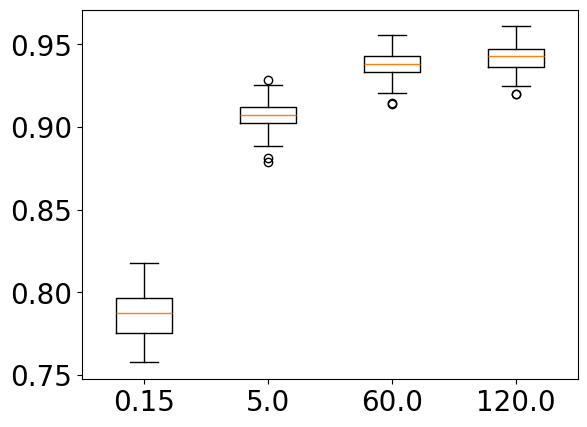

In [12]:
#Errorbar plot for sniplen 100 per c
snip_df = param_df[param_df['sniplen'] == 100]
data = [snip_df[snip_df['c'] == c]['f1'].to_numpy() for c in cs]
plt.boxplot(data)
plt.xticks([1,2,3,4], labels=cs)
plt.tick_params(axis='both', labelsize=20)

In [13]:
#Lineplot showing how c affects the accuracy of different sniplens

def getLineplot():
    for sniplen in SNIPPET_LENS:
        snip_df = param_df[param_df['sniplen'] == sniplen]
        ax = sns.lineplot(data=snip_df, x='c', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000)
        ax.text(90, ax.lines[-1].get_ydata()[-2]-0.005, sniplen, bbox=dict(facecolor='gray', alpha=1))
    lbls = []
    for l in SNIPPET_LENS:
        lbls.append(str(l))
        lbls.append(str(l)+"_99%_ci")
    

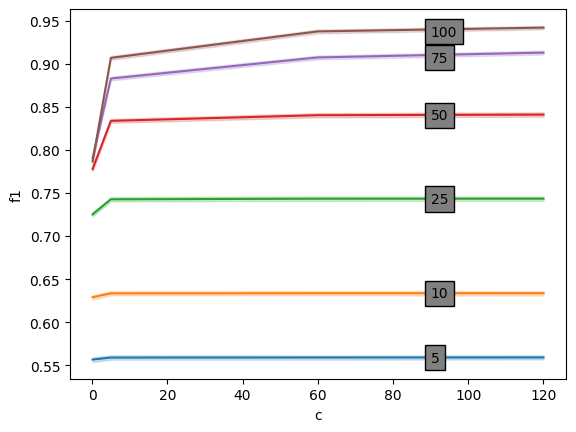

In [14]:
getLineplot()

## Plot accuracy and keylist_id (with different c's)

In [37]:
def getLineplotKeylists(c_val):
    start = 0
    increment = 0.05
    for sniplen in SNIPPET_LENS:
        snip_df = param_df[(param_df['sniplen'] == sniplen) & (param_df['c'] == c_val)]
        ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000)
        ax.set_ylim(0.5, 1)
        if sniplen == 5:
            start = ax.lines[-1].get_ydata()[-1]-increment
        ax.text(107, start+increment, sniplen, bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=0.7))
        start += increment
    lbls = []
    for l in SNIPPET_LENS:
        lbls.append(str(l))
        lbls.append(str(l)+"_99%_ci")

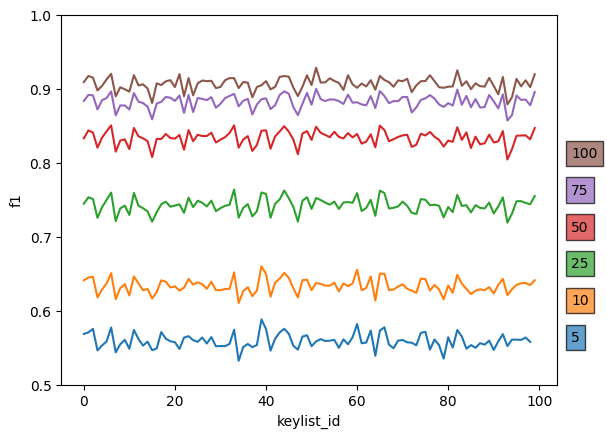

In [38]:
getLineplotKeylists(5)

In [1]:
keylist_diffs = []
maxss = []
minss = []
for i in SNIPPET_LENS:
    filtered = param_df[(param_df['sniplen'] == i)].sort_values('f1', ascending=False).drop_duplicates('keylist_id')[['f1']]
    mins = np.min(filtered.to_numpy())
    maxs = np.max(filtered.to_numpy())
    maxss.append(maxs)
    minss.append(mins)
    keylist_diffs.append(np.add(maxs, -mins))
print(keylist_diffs)
print(maxss)
print(minss)

NameError: name 'SNIPPET_LENS' is not defined

In [ ]:
min_max_diff = []
for i in range(100):
    filtered = param_df[(param_df['keylist_id'] == i)][['sniplen','f1']]
    maxs = np.array([np.max(filtered[filtered['sniplen'] == x]['f1'].to_numpy()) for x in SNIPPET_LENS])
    mins = np.array([np.min(filtered[filtered['sniplen'] == x]['f1'].to_numpy()) for x in SNIPPET_LENS])
    print(np.add(maxs, -mins))

[0.00170845 0.00352139 0.01699146 0.06106148 0.11936805 0.15633001]
[0.00199044 0.00248641 0.01587502 0.05685777 0.10918962 0.14311566]
[0.00103604 0.00302743 0.0152588  0.05663974 0.11210676 0.14766766]
[0.00298429 0.0059024  0.02132091 0.06852476 0.13778392 0.17774388]
[0.00248525 0.00441836 0.0193902  0.06663388 0.12625643 0.16411292]
[0.00275159 0.0063814  0.02005809 0.06543974 0.1201043  0.14856579]
[0.00168794 0.00372993 0.01751628 0.05764848 0.11789029 0.14204546]
[0.00272912 0.00437502 0.01883845 0.06661494 0.1328285  0.1737711 ]
[0.00323446 0.00528831 0.02273589 0.07735291 0.14358826 0.17972688]
[0.0015934  0.00476497 0.02121814 0.07292614 0.12887407 0.15778419]
[0.00263776 0.00430969 0.01867033 0.06353227 0.13585216 0.17085401]
[0.00135108 0.00282179 0.01753803 0.05736576 0.11360855 0.14002579]
[0.00222589 0.00582291 0.01758834 0.06350132 0.12204443 0.15632378]
[0.0033859  0.00603131 0.02286188 0.07365897 0.14126571 0.17152466]
[0.00167584 0.00431791 0.01662769 0.06450644 0.1

In [ ]:
query = param_df.sort_values('f1', ascending=False).drop_duplicates(['keylist_id','sniplen'])[['sniplen','c']].to_numpy()
tuples = [(x[0], x[1]) for x in query]
print(Counter(tuples))

Counter({(100.0, 120.0): 100, (75.0, 120.0): 100, (50.0, 120.0): 92, (25.0, 120.0): 64, (10.0, 120.0): 54, (5.0, 120.0): 53, (5.0, 60.0): 41, (10.0, 60.0): 34, (25.0, 60.0): 31, (10.0, 5.0): 12, (50.0, 60.0): 8, (5.0, 5.0): 6, (25.0, 5.0): 5})


In [ ]:
print(param_df.sort_values('f1', ascending=False).drop_duplicates(['keylist_id','sniplen']))

      keylist_id  sniplen      c        f1
1991          82      100  120.0  0.960813
1247          51      100  120.0  0.958680
527           21      100  120.0  0.955528
167            6      100  120.0  0.954608
1415          58      100  120.0  0.953928
...          ...      ...    ...       ...
986           41        5   60.0  0.546077
171            7        5  120.0  0.543647
1538          64        5   60.0  0.539121
1899          79        5  120.0  0.535159
817           34        5    5.0  0.532210

[600 rows x 4 columns]


In [ ]:
print(param_df[param_df.sniplen == 10].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

      keylist_id  sniplen      c        f1
943           39       10  120.0  0.660360
1446          60       10   60.0  0.655596
798           33       10   60.0  0.651888
1062          44       10   60.0  0.651446
150            6       10   60.0  0.650787
...          ...      ...    ...       ...
367           15       10  120.0  0.616566
174            7       10   60.0  0.615715
1903          79       10  120.0  0.615533
1543          64       10  120.0  0.613752
823           34       10  120.0  0.610646

[100 rows x 4 columns]


In [ ]:
print(param_df[param_df.sniplen == '25'].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

Empty DataFrame
Columns: [keylist_id, sniplen, c, f1]
Index: []


In [ ]:
print(param_df[param_df.sniplen == '50'].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

Empty DataFrame
Columns: [keylist_id, sniplen, c, f1]
Index: []


In [ ]:
print(param_df[param_df.sniplen == '75'].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

Empty DataFrame
Columns: [keylist_id, sniplen, c, f1]
Index: []


In [ ]:
print(param_df[param_df.sniplen == 100].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100]['c'].to_numpy())

[120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120.]


In [ ]:
print(df[(df.sniplen == 100) & (df.c==120)].sort_values('f1', ascending=False))

      keylist_id  sniplen      c     tol        f1  \
1991          82      100  120.0  0.0001  0.960813   
1247          51      100  120.0  0.0001  0.958680   
527           21      100  120.0  0.0001  0.955528   
167            6      100  120.0  0.0001  0.954608   
1415          58      100  120.0  0.0001  0.953928   
...          ...      ...    ...     ...       ...   
2279          94      100  120.0  0.0001  0.925984   
1151          47      100  120.0  0.0001  0.925485   
599           24      100  120.0  0.0001  0.924908   
2255          93      100  120.0  0.0001  0.920185   
383           15      100  120.0  0.0001  0.919993   

                                    important_feats_7-8  \
1991  [-, tokaisi, taatusti, Onneksi, kertoi, neiti,...   
1247  [luku, –, Lapset, taatusti, Onneksi, sanaakaan...   
527   [totesi, tokaisi, kauhean, Lapset, pimeää, toi...   
167   [Lapset, mietti, melko, –, Luulen, vanhan, pie...   
1415  [Lapset, luokan, jätti, Tiesin, innoissaan, to... 

In [ ]:
print(Counter([x for y in df.sort_values('f1', ascending=False)[:1]['important_feats_9-12'].to_numpy() for x in y]))

Counter({'Orvokki': 1, 'b.': 1, 'a.': 1, 'Tulisydän': 1, 'ainoastaan': 1, 'Niiden': 1, 'Lehti': 1, 'tunnu': 1, 'kerta': 1, 'luokse': 1, 'lattiaa': 1, 'vilkaisi': 1, 'lähemmäksi': 1, 'hengissä': 1, 'tavannut': 1, 'käteen': 1, 'Jo': 1, 'ystäväni': 1, 'oo': 1, 'pelkkää': 1, 'sanoi': 1, 'Yritin': 1, 'kohottaa': 1, 'kuvitella': 1, 'nostaa': 1, 'jatkaa': 1, 'Sade': 1, 'pysyä': 1, 'varmaankin': 1, 'hengittää': 1, 'Ilmeisesti': 1, 'olevan': 1, 'pudistaa': 1, 'pitämään': 1, 'valmiiksi': 1, 'tarkkaan': 1, 'ajattelee': 1, 'hetken': 1, 'ilmaa': 1, 'pystyy': 1, 'palaa': 1, 'kovasti': 1, 'lattialle': 1, 'asiasta': 1, 'b': 1, 'Etkö': 1, 'Itse': 1, 'hyvänsä': 1, 'nousivat': 1, 'hetki': 1, 'tuntui': 1, 'useita': 1, 'luultavasti': 1, 'asteli': 1, 'istua': 1, 'esimerkiksi': 1, 'kiertää': 1, 'muutama': 1, 'etsiä': 1, 'uskaltanut': 1, 'tarkoittaa': 1, 'joukko': 1, 'myöntää': 1, 'hetkeksi': 1, 'katosi': 1, 'käy': 1, 'lähde': 1, 'suorastaan': 1, 'tavallinen': 1, 'huomasin': 1, 'avaa': 1, 'omassa': 1, 'pitkä'